In [32]:
import numpy as np
from scipy.fftpack import fft, ifft
from scipy.stats import skew, kurtosis, moment

import numpy as np
from scipy.stats import skew, kurtosis, moment
from scipy.fft import fft, ifft

# Assuming 'x' and 'Fbe' are already defined, and 'Fs' is the sampling frequency
# Make sure 'x' is a numpy array (e.g., x = np.array([...]))

def loychikSD_NP(x, Fs, Fbe):
    # Frequency bin centers
    F = Fbe[:-1] + np.diff(Fbe)

    X = fft(x)
    t = np.arange(0, len(x)) / Fs  # equivalent to the original t calculation
    dF = 1 / t[-1]
    Ff = np.arange(0, len(x)) * dF

    # Statistical moments
    M = np.array([
        np.mean(x),
        np.var(x),
        skew(x),
        kurtosis(x),
        moment(x, 1),
        moment(x, 2),
        moment(x, 3)
    ])

    # Initialize result arrays
    Gx = np.zeros(len(F))
    Sx = np.zeros(len(F))
    Kx = np.zeros(len(F))
    M3x = np.zeros(len(F))
    M4x = np.zeros(len(F))
    
    #Kx = M4x/(Gx)^2

    for ii in range(len(F)):
        if(ii%5==0):
            print(f"{ii + 1} / {len(F)}")  # Counter to determine where you are in run

        # Begin low-pass filter by zeroing bins
        Xn = np.argmax(Ff >= Fbe[ii + 1])  # find the first index where Ff >= Fbe[ii + 1]

        cutX = X[1:Xn]
        XI = np.zeros_like(X)
        XI[1:Xn] = cutX

        # Flipping and conjugating for symmetry
        XI = np.flipud(XI)
        XI[0:Xn - 1] = np.conj(cutX)
        XI = np.flipud(XI)

        xifft = ifft(XI)

        # Extracting the real part of the inverse FFT result
        real_xifft = np.real(xifft)  # this makes sure you're calculating statistics on real numbers

        # Statistical calculations
        Gx[ii] = np.var(real_xifft)
        Sx[ii] = skew(real_xifft)
        Kx[ii] = kurtosis(real_xifft)+3
        M3x[ii] = moment(real_xifft, 3)
        M4x[ii] = moment(real_xifft, 4)

    return M, F, Gx, Sx, Kx

# The variables Gx, Sx, Kx, M3x, M4x hold the results and can be used as needed



In [33]:
import numpy as np
import scipy.io
import scipy.signal
import scipy.ndimage

# The octspace function is not directly available in Python's standard libraries, you may have to implement it
# Fbe = octspace(10, 6000, 12).center  # Your octave space function
Fbe = np.logspace(np.log10(10), np.log10(6000), 120)  # Placeholder using logspace
Fbe = Fbe  # Assuming Fbe.center in MATLAB just returns Fbe

### Audio Input

In [36]:
from scipy.signal import butter, filtfilt
from scipy.signal import hann, welch
import numpy as np

from scipy.io import wavfile

# Read audio file
#filefolder = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_pitch_stability/neumann/0000.wav")

Fs, audio_data = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_pitch_stability/neumann/0000.wav")

# Use the audio_data as your x3 or whichever variable you want to replace
x3 = audio_data.astype(float)


M, F, Gx1, Sx1, Kx1 = loychikSD_NP(x3, Fs, Fbe)

# Power Spectral Density
Gxx1 = np.gradient(Gx, F)

# Skewness Spectral Density
Sxx1 = np.gradient(Sx, F)

# Kurtosis Spectral Density
Kxx1 = np.gradient(Kx, F)

# Fourth Central Moment Spectral Density
# M4xx = np.gradient(Kx * Gx ** 2, F)

# Clear variables
# del x, x2, x3

# Save variables
scipy.io.savemat("Audio-1.mat", {"M": M, "F": F, "Gx": Gx, "Sx": Sx, "Kx": Kx})

print("MAT file saved. Mission accomplished.")




/var/folders/g8/ryts82jd3c33vl83y_np4dzm0000gn/T/ipykernel_50383/381055675.py:10: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs, audio_data = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_pitch_stability/neumann/0000.wav")


1 / 99
6 / 99
11 / 99
16 / 99
21 / 99
26 / 99
31 / 99
36 / 99
41 / 99
46 / 99
51 / 99
56 / 99
61 / 99
66 / 99
71 / 99
76 / 99
81 / 99
86 / 99
91 / 99
96 / 99
MAT file saved. Mission accomplished.


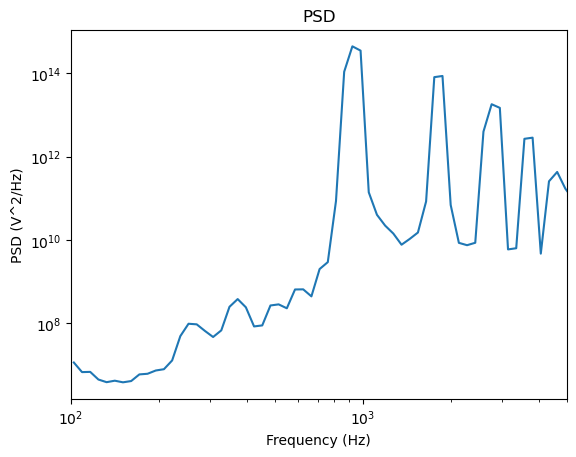

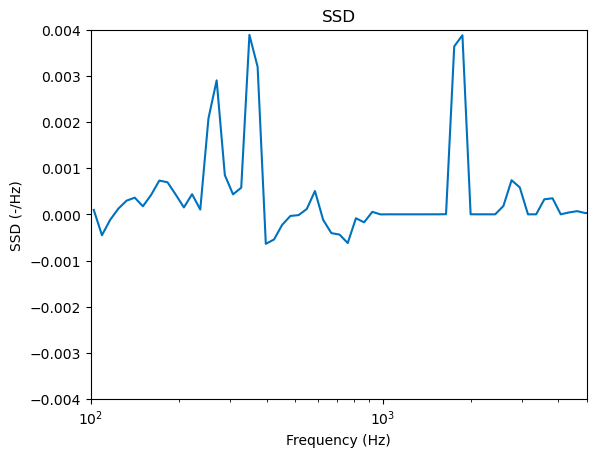

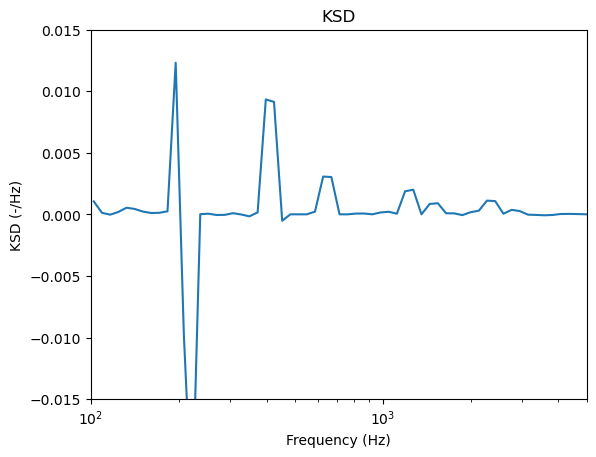

In [37]:
# Graphs

import matplotlib.pyplot as plt
import scipy.io
import numpy as np

# Load MAT file
data = scipy.io.loadmat("Audio-1.mat")
GxxW = data['Gx']
f = data['F']

#Figure 1
# plt.figure(1)

# plt.subplot(1, 2, 1)
# plt.loglog(f, GxxW[:, 2], linewidth=1.5)
# plt.ylabel('PSD (g^2/Hz)')
# plt.xlabel('Frequency (Hz)')
# plt.title('PSD of Signal')

# plt.subplot(1, 2, 2)
# plt.loglog(f, GxxW[:], linewidth=1.5)
# plt.ylabel('PSD (g^2/Hz)')
# plt.xlabel('Frequency (Hz)')
# plt.title('PSD from Different Seeds at Different Frequencies')
# plt.legend(['Gaussian Process', 'Lognormal Process'], loc='lower left')


# Figure 2
# plt.figure(2)
# plt.clf()

# plt.subplot(2, 2, (1, 2))
# plt.semilogy(faaa, xaaa, linewidth=2, color=[.4, .4, .4])
# plt.semilogy(faaa2, xaaa2, linewidth=2, color=[.7, .7, .7])
# plt.xlim([-20, 10])
# plt.ylim([.000001, 1.1])
# plt.ylabel('Probability Density (log-scale)')
# plt.xlabel('Sample')
# plt.legend(['Gaussian', 'Non-Gaussian'])

# 
# Figure 2 (continued)
# plt.subplot(2, 2, 3)
# plt.plot(tclip, xclip1, color=[.4, .4, .4])
# plt.xlim([0, 2])
# plt.ylim([-10, 10])
# plt.title('Gaussian')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')

# plt.subplot(2, 2, 4)
# plt.plot(tclip, xclip2, color=[.7, .7, .7])
# plt.xlim([0, 2])
# plt.ylim([-10, 10])
# plt.title('Non-Gaussian')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')

# # Figure 3
plt.figure(3)
plt.loglog(F[F>100],Gxx1[35:], linewidth=1.5)
plt.title('PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.xlim([100, 5000])

# Figure 4
plt.figure(4)
plt.semilogx(F[F>100], Sxx1[35:], linewidth=1.5, color=[0, 0.4470, 0.7410])
plt.title('SSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('SSD (-/Hz)')
plt.xlim([100, 5000])
plt.ylim([-.004, .004])

# # Figure 5
plt.figure(5)
plt.semilogx(F[F>100], Kxx1[35:], linewidth=1.5)
plt.title('KSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('KSD (-/Hz)')
plt.xlim([100, 5000])
plt.ylim([-.015, .015])

plt.show()


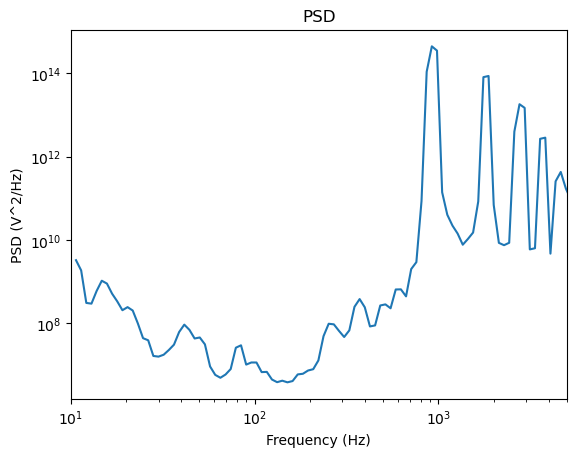

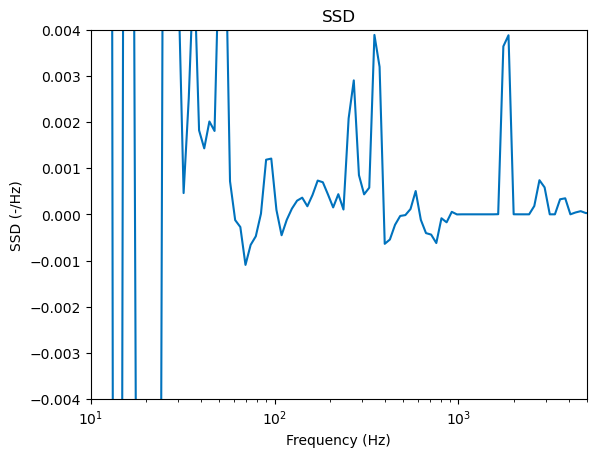

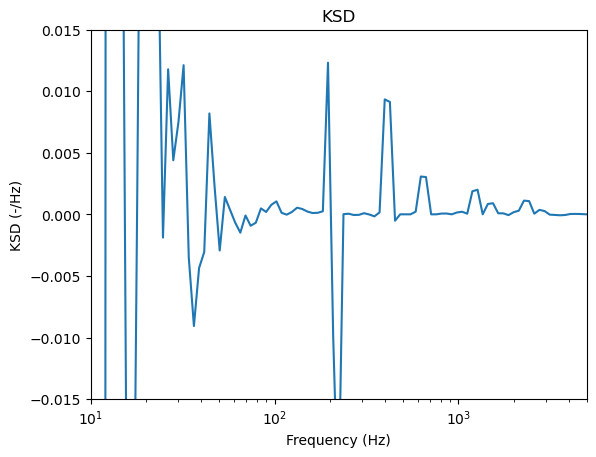

In [38]:
plt.figure(3)
plt.loglog(F, Gxx1, linewidth=1.5)
plt.title('PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.xlim([10, 5000])

plt.figure(4)
plt.semilogx(F, Sxx1, linewidth=1.5, color=[0, 0.4470, 0.7410])
plt.title('SSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('SSD (-/Hz)')
plt.xlim([10, 5000])
plt.ylim([-.004, .004])

plt.figure(5)
plt.semilogx(F, Kxx1, linewidth=1.5)
plt.title('KSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('KSD (-/Hz)')
plt.xlim([10, 5000])
plt.ylim([-.015, .015])

plt.show()

(100000000000.0, 1e+17)

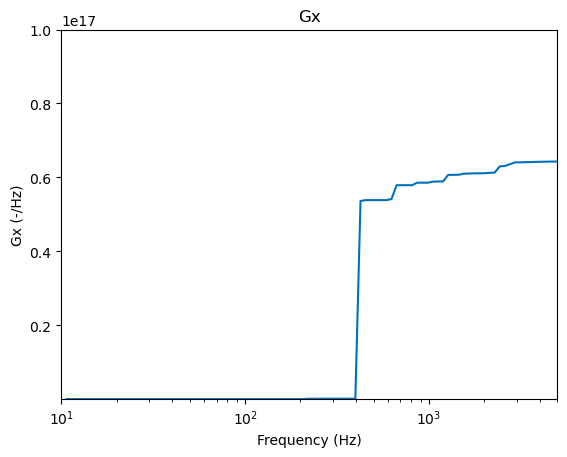

In [50]:

plt.figure(4)
plt.semilogx(F, Gx1, linewidth=1.5, color=[0, 0.4470, 0.7410])
plt.title('Gx')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gx (-/Hz)')
plt.xlim([10, 5000])
plt.ylim([10**11,10**17])

In [42]:
Gx1

array([1.61405508e+11, 7.49479924e+11, 8.63898647e+11, 9.61320137e+11,
       1.08156151e+12, 1.34045955e+12, 1.40369244e+12, 1.45789011e+12,
       1.46877936e+12, 1.49242452e+12, 1.55116925e+12, 1.70357230e+12,
       1.82070567e+12, 1.85241513e+12, 1.87388636e+12, 1.91015667e+12,
       1.91655742e+12, 1.92271328e+12, 1.93765098e+12, 1.94771286e+12,
       1.96438081e+12, 1.99030173e+12, 2.03856527e+12, 2.05426617e+12,
       2.07465096e+12, 2.08859795e+12, 2.09956840e+12, 2.10449625e+12,
       2.10831550e+12, 2.11182194e+12, 2.11372158e+12, 2.11464136e+12,
       2.11748856e+12, 2.11894426e+12, 2.11963469e+12, 2.23960752e+12,
       2.24080983e+12, 2.24161871e+12, 2.24378452e+12, 2.24507630e+12,
       2.24623508e+12, 2.24813526e+12, 2.24895748e+12, 2.25038538e+12,
       2.25174126e+12, 2.25698840e+12, 1.47808834e+13, 1.11248889e+14,
       1.11264742e+14, 1.11298790e+14, 1.11687651e+14, 1.12670437e+14,
       1.12952532e+14, 1.13205466e+14, 1.13416686e+14, 1.14064639e+14,
      

In [28]:
Sx1

array([-0.21634919, -0.00870042, -0.00554494, -0.03001652, -0.06346586,
       -0.053722  , -0.03188681, -0.04289983, -0.04948045, -0.05875296,
       -0.06563824, -0.03474633, -0.02421104, -0.0284047 , -0.01094307,
       -0.03036705, -0.03166092, -0.03585171, -0.01063924, -0.02171717,
       -0.01141172, -0.0121416 , -0.00445131,  0.01202813,  0.02305101,
        0.01350809,  0.01658407,  0.0179489 ,  0.00970394,  0.01154009,
        0.00997744,  0.01021103,  0.00880007,  0.00829063,  0.00872391,
        0.005734  ,  0.00666032,  0.00635122,  0.00814738,  0.00879328,
        0.0097509 ,  0.01066303,  0.01043196,  0.01073427,  0.01125801,
        0.01315219,  0.01245941,  0.00319198,  0.00268228,  0.00253763,
        0.0032757 ,  0.0030362 ,  0.00322503,  0.00370387,  0.00379034,
        0.00502648,  0.00591381,  0.00553565,  0.00541494,  0.00541591,
        0.00541557,  0.00541442,  0.00541426,  0.00333235, -0.01450572,
       -0.01449823, -0.01449817, -0.01448916,  0.08646949,  0.08

In [29]:
M
# 

array([-2.41135606e+03,  6.42956816e+16,  1.20314201e-01,  1.32936055e+00,
        0.00000000e+00,  6.42956816e+16,  1.96150581e+24])

In [30]:
Kx1

array([3.48043959, 2.36882474, 2.46587647, 2.57550153, 2.60495711,
       2.6814023 , 2.6779941 , 2.62410526, 2.58052108, 2.63284449,
       2.71094337, 2.76222257, 2.85696701, 2.8278837 , 2.85454108,
       2.86701968, 2.86984255, 2.89758489, 2.91945627, 2.8781565 ,
       2.87961278, 2.8545938 , 2.8655716 , 2.90302448, 2.87531151,
       2.88646276, 2.88420726, 2.88971584, 2.87781536, 2.87796094,
       2.87690135, 2.8686262 , 2.87058272, 2.87397764, 2.87248389,
       2.88435028, 2.88570598, 2.88600304, 2.88522432, 2.88938727,
       2.89446841, 2.89716097, 2.89874517, 2.89930142, 2.9015948 ,
       2.90517766, 3.23281816, 2.57721013, 2.57746592, 2.5775663 ,
       2.57923821, 2.57527553, 2.57811979, 2.57878947, 2.57743382,
       2.57108158, 2.58639322, 3.08072965, 3.05223386, 3.05223981,
       3.05224123, 3.05222001, 3.05220811, 3.06964718, 3.31426765,
       3.31426216, 3.314254  , 3.31424102, 3.32102181, 3.32101245,
       3.32101049, 3.34132547, 3.34832039, 3.34830214, 3.65604

## Instrument 2(Flute)

In [31]:
from scipy.signal import butter, filtfilt
from scipy.signal import hann, welch
import numpy as np

from scipy.io import wavfile

# Read audio file
sample_rate, audio_data = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/flute_almudena_stability/neumann/0000.wav")

# Use the audio_data as your x3 or whichever variable you want to replace
x3 = audio_data.astype(float)


M, F, Gx, Sx, Kx2 = loychikSD_NP(x3, Fs, Fbe)

# Power Spectral Density
Gxx2 = np.gradient(Gx, F)

# Skewness Spectral Density
Sxx2 = np.gradient(Sx, F)

# Kurtosis Spectral Density
Kxx2 = np.gradient(Kx2, F)

# Fourth Central Moment Spectral Density
# M4xx = np.gradient(Kx * Gx ** 2, F)

# Clear variables
# del x, x2, x3

# Save variables
scipy.io.savemat("Audio-1.mat", {"M": M, "F": F, "Gx": Gx, "Sx": Sx, "Kx": Kx})

print("MAT file saved. Mission accomplished.")




/var/folders/g8/ryts82jd3c33vl83y_np4dzm0000gn/T/ipykernel_50383/87171409.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/flute_almudena_stability/neumann/0000.wav")


1 / 99
6 / 99
11 / 99
16 / 99
21 / 99
26 / 99
31 / 99
36 / 99
41 / 99
46 / 99
51 / 99
56 / 99
61 / 99
66 / 99
71 / 99
76 / 99
81 / 99
86 / 99
91 / 99
96 / 99
MAT file saved. Mission accomplished.


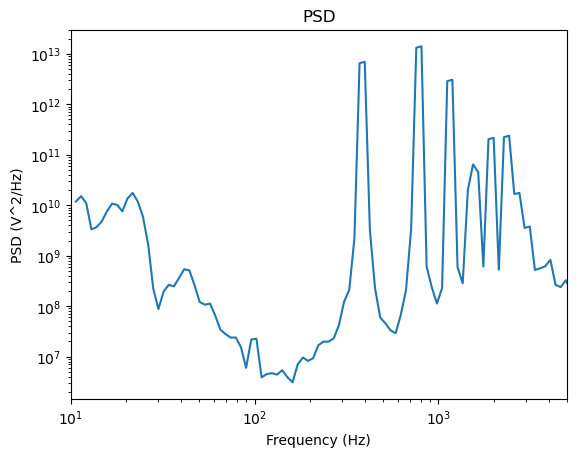

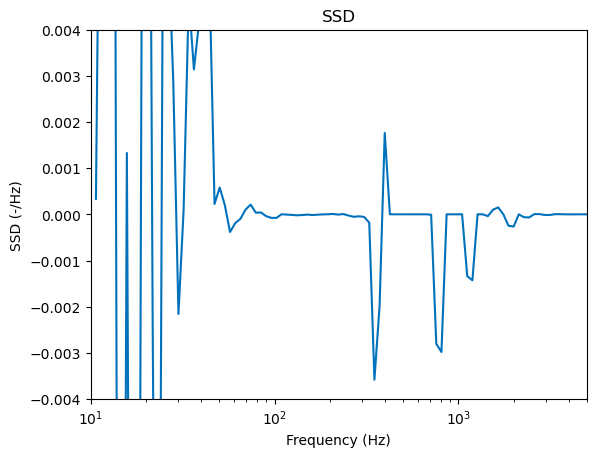

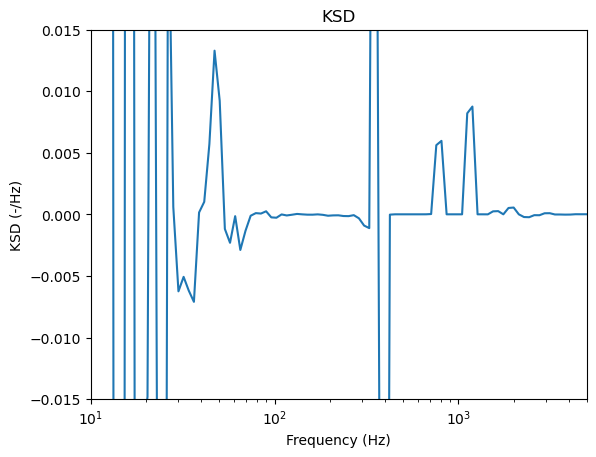

In [32]:
plt.figure(3)
plt.loglog(F, Gxx2, linewidth=1.5)
plt.title('PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.xlim([10, 5000])

plt.figure(4)
plt.semilogx(F, Sxx2, linewidth=1.5, color=[0, 0.4470, 0.7410])
plt.title('SSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('SSD (-/Hz)')
plt.xlim([10, 5000])
plt.ylim([-.004, .004])

plt.figure(5)
plt.semilogx(F, Kxx2, linewidth=1.5)
plt.title('KSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('KSD (-/Hz)')
plt.xlim([10, 5000])
plt.ylim([-.015, .015])

plt.show()

## Instrument 3 (trumpet)

In [33]:
from scipy.signal import butter, filtfilt
from scipy.signal import hann, welch
import numpy as np

from scipy.io import wavfile

# Read audio file
sample_rate, audio_data = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/trumpet_ramon_pitch_stability/neumann/0000.wav")

# Use the audio_data as your x3 or whichever variable you want to replace
x3 = audio_data.astype(float)


M, F, Gx, Sx, Kx3 = loychikSD_NP(x3, Fs, Fbe)

# Power Spectral Density
Gxx3 = np.gradient(Gx, F)

# Skewness Spectral Density
Sxx3 = np.gradient(Sx, F)

# Kurtosis Spectral Density
Kxx3 = np.gradient(Kx3, F)

# Fourth Central Moment Spectral Density
# M4xx = np.gradient(Kx * Gx ** 2, F)

# Clear variables
# del x, x2, x3

# Save variables
scipy.io.savemat("Audio-1.mat", {"M": M, "F": F, "Gx": Gx, "Sx": Sx, "Kx": Kx})

print("MAT file saved. Mission accomplished.")




/var/folders/g8/ryts82jd3c33vl83y_np4dzm0000gn/T/ipykernel_50383/1661894878.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/trumpet_ramon_pitch_stability/neumann/0000.wav")


1 / 99
6 / 99
11 / 99
16 / 99
21 / 99
26 / 99
31 / 99
36 / 99
41 / 99
46 / 99
51 / 99
56 / 99
61 / 99
66 / 99
71 / 99
76 / 99
81 / 99
86 / 99
91 / 99
96 / 99
MAT file saved. Mission accomplished.


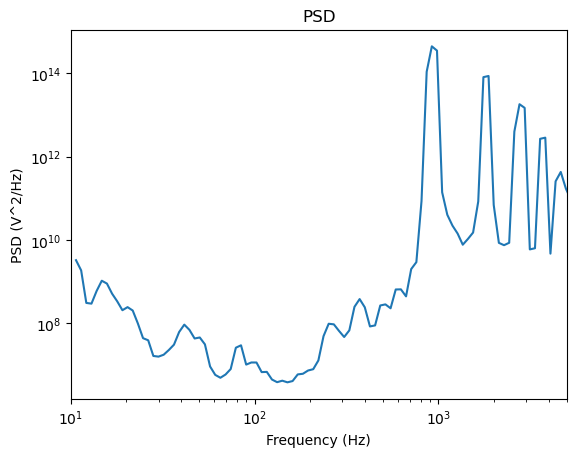

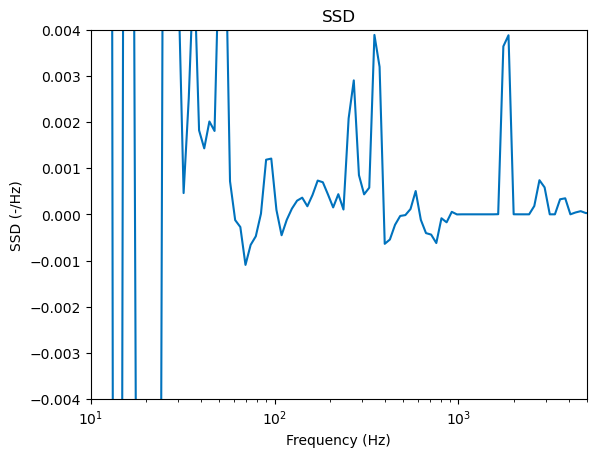

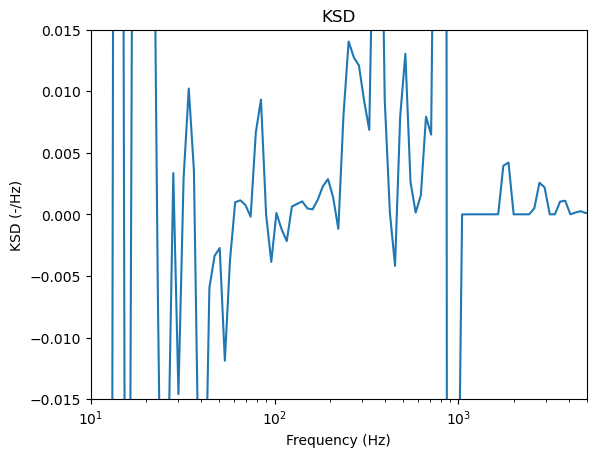

In [34]:
plt.figure(3)
plt.loglog(F, Gxx3, linewidth=1.5)
plt.title('PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.xlim([10, 5000])

plt.figure(4)
plt.semilogx(F, Sxx3, linewidth=1.5, color=[0, 0.4470, 0.7410])
plt.title('SSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('SSD (-/Hz)')
plt.xlim([10, 5000])
plt.ylim([-.004, .004])

plt.figure(5)
plt.semilogx(F, Kxx3, linewidth=1.5)
plt.title('KSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('KSD (-/Hz)')
plt.xlim([10, 5000])
plt.ylim([-.015, .015])

plt.show()

In [1]:

plt.figure(4)
plt.semilogx(F, Sx, linewidth=1.5, color=[0, 0.4470, 0.7410])
plt.title('SSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('SSD (-/Hz)')
plt.xlim([10, 5000])
plt.ylim([-.004, .004])

NameError: name 'plt' is not defined

### Overlap of Violin, flute and trumpet

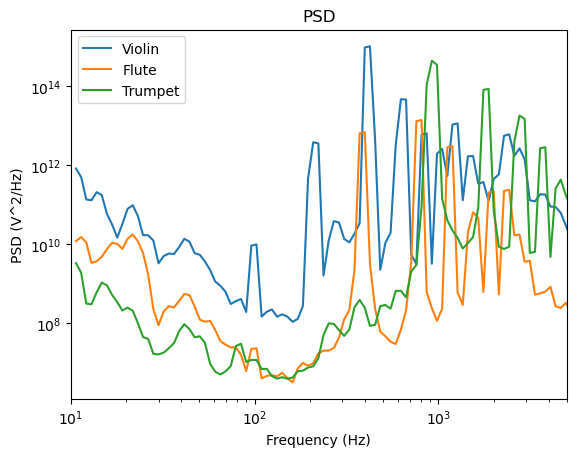

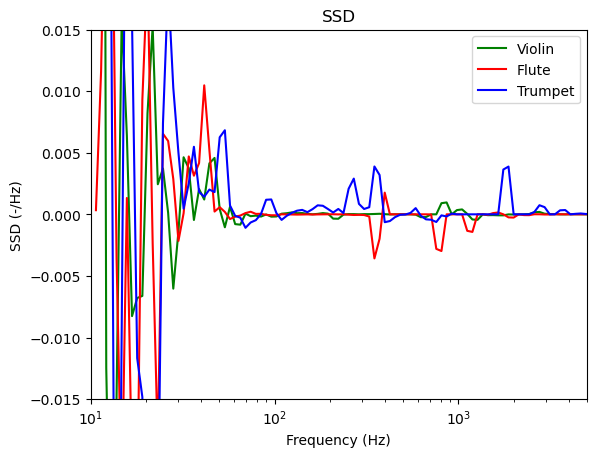

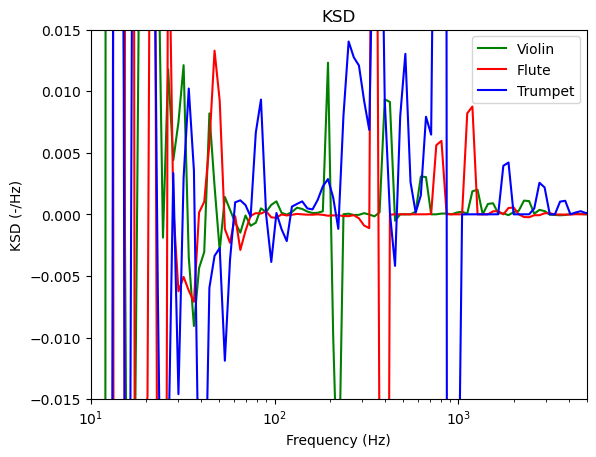

In [35]:
plt.figure(3)
plt.loglog(F, Gxx1, linewidth=1.5)
plt.loglog(F, Gxx2, linewidth=1.5)
plt.loglog(F, Gxx3, linewidth=1.5)
plt.title('PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.xlim([10, 5000])
plt.legend(labels=["Violin", "Flute","Trumpet"])

plt.figure(4)
plt.semilogx(F, Sxx1, linewidth=1.5,color='green',label="Violin")
plt.semilogx(F, Sxx2, linewidth=1.5,color='red',label="Flute")
plt.semilogx(F, Sxx3, linewidth=1.5,color='blue',label="Trumpet")

plt.title('SSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('SSD (-/Hz)')
plt.xlim([10, 5000])
plt.ylim([-.015, .015])
plt.legend(labels=["Violin", "Flute","Trumpet"])

plt.show()
plt.figure(5)
plt.semilogx(F, Kxx1, linewidth=1.5,color='green',label="Violin")
plt.semilogx(F, Kxx2, linewidth=1.5,color='red',label="Flute")
plt.semilogx(F, Kxx3, linewidth=1.5,color='blue',label="Trumpet")

plt.title('KSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('KSD (-/Hz)')
plt.xlim([10, 5000])
plt.ylim([-.015, .015])
plt.legend(labels=["Violin", "Flute","Trumpet"])

plt.show()

## Creation of Mat files

In [3]:
from scipy.signal import butter, filtfilt
from scipy.signal import hann, welch
import numpy as np
import os

from scipy.io import wavfile

instruments = ['flute_almudena_stability','violin_raquel_richness','clarinet_pablo_richness','trumpet_ramon_pitch_stability']
# Read audio file
filepath = "/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_pitch_stability/neumann"


In [4]:
filelist = []
filepath = "/Users/karthikkurella/Downloads/good-sounds/sound_files/"
for i in instruments:
    filetemp = filepath+i+'/'+'neumann'
    counter = 0
    for filename in os.listdir(filetemp):
        if filename.endswith('.wav'):
            filelist.append(filename)
        counter+=1
    print(counter)
len(filelist)

36
76
92
60


256

In [6]:
audio_data = []

import scipy.io
from scipy.signal import butter, filtfilt
from scipy.signal import hann, welch
import numpy as np

# explore the data size from 12 to 120 ?

Fbe = np.logspace(np.log10(10), np.log10(6000), 120)  # Placeholder using logspace
filepath = "/Users/karthikkurella/Downloads/good-sounds/sound_files/"

from scipy.io import wavfile

import os
for i,file in enumerate(instruments):
    fp = filepath+''+file+'/neumann/'
    print(fp)
    arr = [fp + x for x in os.listdir(fp) if x.endswith('.wav')]
    print(arr)
    for j,f in enumerate(arr):
        print(f)
        with open(f, 'rb') as wf:
            Fs, audio_data = wavfile.read(wf)
        x3 = audio_data.astype(float)

        M, F, Gx, Sx, Kx = loychikSD_NP(x3, Fs, Fbe)

        # Power Spectral Density
        Gxx = np.gradient(Gx, F)

        # Skewness Spectral Density
        Sxx = np.gradient(Sx, F)

        # Kurtosis Spectral Density
        Kxx = np.gradient(Kx, F)

        # Fourth Central Moment Spectral Density
        # M4xx = np.gradient(Kx * Gx ** 2, F)

        # Clear variables
        # del x, x2, x3

        # Save variables
        # Specify the filename
        output_path = '/Users/karthikkurella/Documents/Audio_mat/'
        filename = f"{file.split('_')[0]}-{j+1}.mat"

        mat_data = {
        "M": M,
        "F": F,
        "Gx": Gx,
        "Sx": Sx,
        "Kx": Kx,
        "Gxx":Gxx,
        "Sxx":Sxx,
        "Kxx":Kxx
        }

        # Save the dictionary into a .mat file
        scipy.io.savemat(output_path+filename, mat_data)

        print(f"Saved {filename}")

/Users/karthikkurella/Downloads/good-sounds/sound_files/flute_almudena_stability/neumann/
['/Users/karthikkurella/Downloads/good-sounds/sound_files/flute_almudena_stability/neumann/0010.wav', '/Users/karthikkurella/Downloads/good-sounds/sound_files/flute_almudena_stability/neumann/0004.wav', '/Users/karthikkurella/Downloads/good-sounds/sound_files/flute_almudena_stability/neumann/0005.wav', '/Users/karthikkurella/Downloads/good-sounds/sound_files/flute_almudena_stability/neumann/0011.wav', '/Users/karthikkurella/Downloads/good-sounds/sound_files/flute_almudena_stability/neumann/0007.wav', '/Users/karthikkurella/Downloads/good-sounds/sound_files/flute_almudena_stability/neumann/0013.wav', '/Users/karthikkurella/Downloads/good-sounds/sound_files/flute_almudena_stability/neumann/0012.wav', '/Users/karthikkurella/Downloads/good-sounds/sound_files/flute_almudena_stability/neumann/0006.wav', '/Users/karthikkurella/Downloads/good-sounds/sound_files/flute_almudena_stability/neumann/0002.wav', 

/var/folders/g8/ryts82jd3c33vl83y_np4dzm0000gn/T/ipykernel_43536/3057648122.py:24: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs, audio_data = wavfile.read(wf)


16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved flute-1.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/flute_almudena_stability/neumann/0004.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved flute-2.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/flute_almudena_stability/neumann/0005.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved flute-3.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/flute_almudena_stability/neumann/0011.wav
1 / 119
6 / 119
11 / 11

111 / 119
116 / 119
Saved flute-25.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/flute_almudena_stability/neumann/0032.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved flute-26.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/flute_almudena_stability/neumann/0033.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved flute-27.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/flute_almudena_stability/neumann/0027.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 /

1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved violin-1.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_richness/neumann/0004.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved violin-2.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_richness/neumann/0038.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved violin-3.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_richness/neumann/0039.wav
1

111 / 119
116 / 119
Saved violin-25.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_richness/neumann/0070.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved violin-26.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_richness/neumann/0058.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved violin-27.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_richness/neumann/0059.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 11

26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved violin-50.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_richness/neumann/0057.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved violin-51.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_richness/neumann/0043.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved violin-52.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_richness/neumann/0042.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 11

6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved clarinet-1.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/clarinet_pablo_richness/neumann/0004.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved clarinet-2.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/clarinet_pablo_richness/neumann/0038.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved clarinet-3.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/clarinet_pablo_richness/neumann/0039.wav


71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved clarinet-25.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/clarinet_pablo_richness/neumann/0070.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved clarinet-26.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/clarinet_pablo_richness/neumann/0058.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved clarinet-27.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/clarinet_pablo_richness/neumann/0059.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 11

1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved clarinet-50.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/clarinet_pablo_richness/neumann/0079.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved clarinet-51.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/clarinet_pablo_richness/neumann/0086.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved clarinet-52.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/clarinet_pablo_richness/neuman

66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved clarinet-74.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/clarinet_pablo_richness/neumann/0024.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved clarinet-75.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/clarinet_pablo_richness/neumann/0030.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved clarinet-76.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/clarinet_pablo_richness/neumann/0026.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 11

6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved trumpet-1.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/trumpet_ramon_pitch_stability/neumann/0004.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved trumpet-2.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/trumpet_ramon_pitch_stability/neumann/0038.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved trumpet-3.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/trumpet_ramon_pitch_stability/ne

6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved trumpet-25.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/trumpet_ramon_pitch_stability/neumann/0053.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved trumpet-26.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/trumpet_ramon_pitch_stability/neumann/0045.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved trumpet-27.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/trumpet_ramon_pitch_stability

6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved trumpet-49.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/trumpet_ramon_pitch_stability/neumann/0037.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved trumpet-50.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/trumpet_ramon_pitch_stability/neumann/0036.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved trumpet-51.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/trumpet_ramon_pitch_stability

## Overlapping Audio signals 

In [34]:
from scipy.signal import butter, filtfilt
from scipy.signal import hann, welch
import numpy as np

from scipy.io import wavfile

# Read audio file
#filefolder = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_pitch_stability/neumann/0000.wav")

Fs, audio_data = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/clarinet_pablo_reference/neumann/0000.wav")

# Use the audio_data as your x3 or whichever variable you want to replace
x3 = audio_data.astype(float)


M, F, Gx1, Sx1, Kx1 = loychikSD_NP(x3, Fs, Fbe)

# Power Spectral Density
Gxx1 = np.gradient(Gx1, F)

# Skewness Spectral Density
Sxx1 = np.gradient(Sx1, F)

# Kurtosis Spectral Density
Kxx1 = np.gradient(Kx1, F)

# Fourth Central Moment Spectral Density
# M4xx = np.gradient(Kx * Gx ** 2, F)

# Clear variables
# del x, x2, x3

# Save variables
scipy.io.savemat("Audio-1.mat", {"M": M, "F": F, "Gx1": Gx1, "Sx1": Sx1, "Kx1": Kx1})

print("MAT file saved. Mission accomplished.")




/var/folders/g8/ryts82jd3c33vl83y_np4dzm0000gn/T/ipykernel_1986/344592270.py:10: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs, audio_data = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/clarinet_pablo_reference/neumann/0000.wav")


1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
MAT file saved. Mission accomplished.


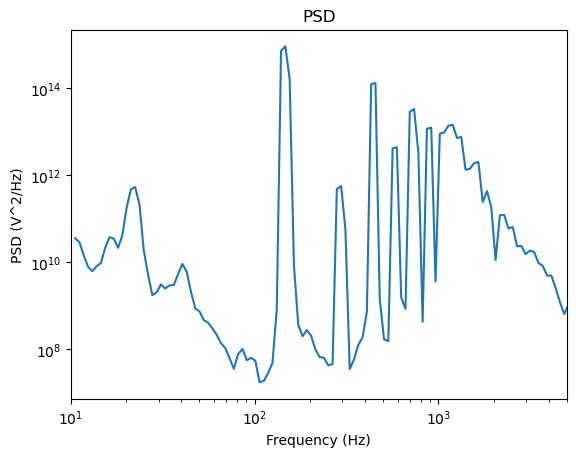

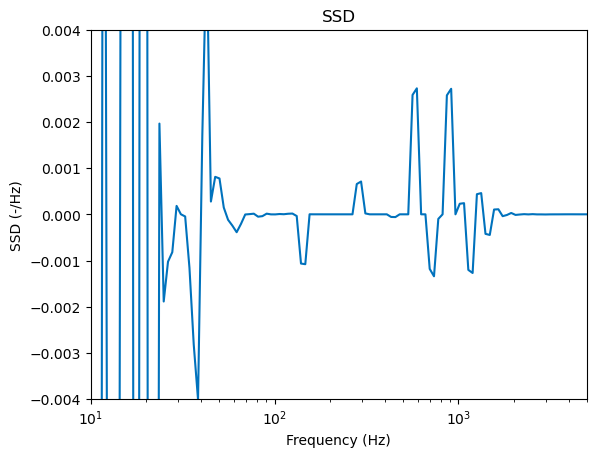

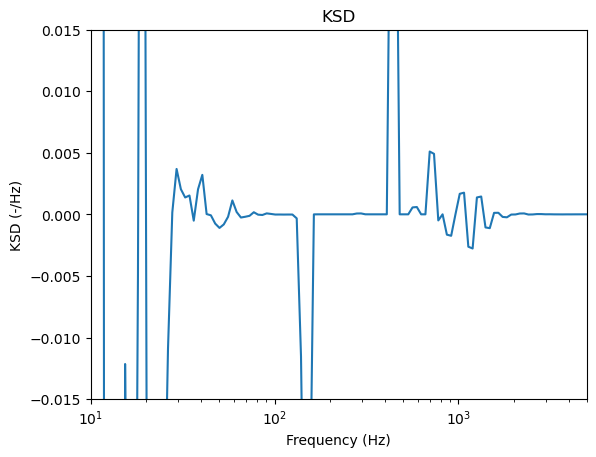

In [35]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np

# Load MAT file
data = scipy.io.loadmat("Audio-1.mat")
GxxW = data['Gx1']
f = data['F']


plt.figure(3)
plt.loglog(F, Gxx1, linewidth=1.5)
plt.title('PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.xlim([10, 5000])

plt.figure(4)
plt.semilogx(F, Sxx1, linewidth=1.5, color=[0, 0.4470, 0.7410])
plt.title('SSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('SSD (-/Hz)')
plt.xlim([10, 5000])
plt.ylim([-.004, .004])

plt.figure(5)
plt.semilogx(F, Kxx1, linewidth=1.5)
plt.title('KSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('KSD (-/Hz)')
plt.xlim([10, 5000])
plt.ylim([-.015, .015])

plt.show()

In [36]:
from scipy.signal import butter, filtfilt
from scipy.signal import hann, welch
import numpy as np

from scipy.io import wavfile

# Read audio file
#filefolder = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_pitch_stability/neumann/0000.wav")

Fs, audio_data = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/flute_almudena_reference/neumann/0000.wav")

# Use the audio_data as your x3 or whichever variable you want to replace
x3 = audio_data.astype(float)


M, F, Gx2, Sx2, Kx2 = loychikSD_NP(x3, Fs, Fbe)

# Power Spectral Density
Gxx2 = np.gradient(Gx2, F)

# Skewness Spectral Density
Sxx2 = np.gradient(Sx2, F)

# Kurtosis Spectral Density
Kxx2 = np.gradient(Kx2, F)

# Fourth Central Moment Spectral Density
# M4xx = np.gradient(Kx * Gx ** 2, F)

# Clear variables
# del x, x2, x3

# Save variables
scipy.io.savemat("Audio-1.mat", {"M": M, "F": F, "Gx2": Gx2, "Sx2": Sx2, "Kx2": Kx2})

print("MAT file saved. Mission accomplished.")




/var/folders/g8/ryts82jd3c33vl83y_np4dzm0000gn/T/ipykernel_1986/2254533305.py:10: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs, audio_data = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/flute_almudena_reference/neumann/0000.wav")


1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
MAT file saved. Mission accomplished.


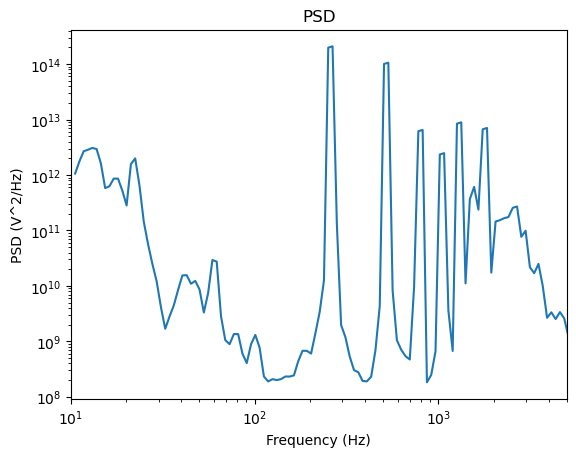

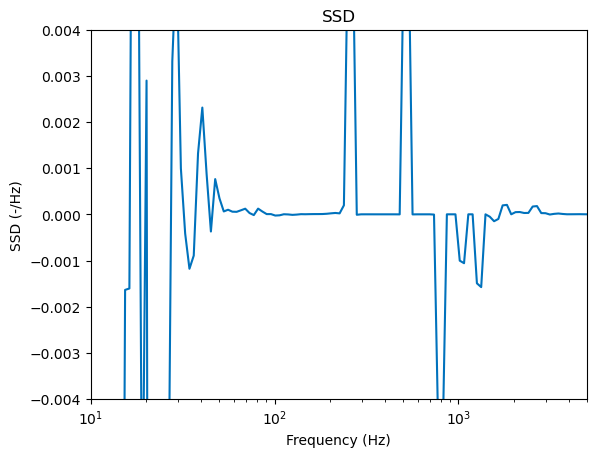

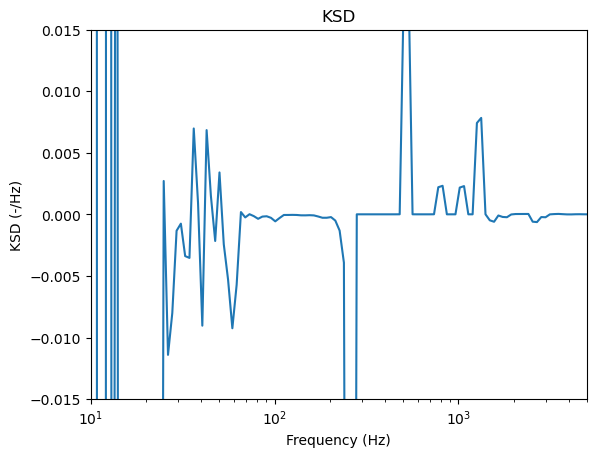

In [37]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np

# Load MAT file
data = scipy.io.loadmat("Audio-1.mat")
GxxW = data['Gx2']
f = data['F']


plt.figure(3)
plt.loglog(F, Gxx2, linewidth=1.5)
plt.title('PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.xlim([10, 5000])

plt.figure(4)
plt.semilogx(F, Sxx2, linewidth=1.5, color=[0, 0.4470, 0.7410])
plt.title('SSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('SSD (-/Hz)')
plt.xlim([10, 5000])
plt.ylim([-.004, .004])

plt.figure(5)
plt.semilogx(F, Kxx2, linewidth=1.5)
plt.title('KSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('KSD (-/Hz)')
plt.xlim([10, 5000])
plt.ylim([-.015, .015])

plt.show()

In [38]:
from scipy.signal import butter, filtfilt
from scipy.signal import hann, welch
import numpy as np

from scipy.io import wavfile

# Read audio file
#filefolder = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_pitch_stability/neumann/0000.wav")

Fs, audio_data = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_reference/neumann/0000.wav")

# Use the audio_data as your x3 or whichever variable you want to replace
x3 = audio_data.astype(float)


M, F, Gx3, Sx3, Kx3 = loychikSD_NP(x3, Fs, Fbe)

# Power Spectral Density
Gxx3 = np.gradient(Gx3, F)

# Skewness Spectral Density
Sxx3 = np.gradient(Sx3, F)

# Kurtosis Spectral Density
Kxx3 = np.gradient(Kx3, F)

# Fourth Central Moment Spectral Density
# M4xx = np.gradient(Kx * Gx ** 2, F)

# Clear variables
# del x, x2, x3

# Save variables
scipy.io.savemat("Audio-1.mat", {"M": M, "F": F, "Gx3": Gx3, "Sx3": Sx3, "Kx3": Kx3})

print("MAT file saved. Mission accomplished.")




/var/folders/g8/ryts82jd3c33vl83y_np4dzm0000gn/T/ipykernel_1986/3016339365.py:10: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs, audio_data = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_reference/neumann/0000.wav")


1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
MAT file saved. Mission accomplished.


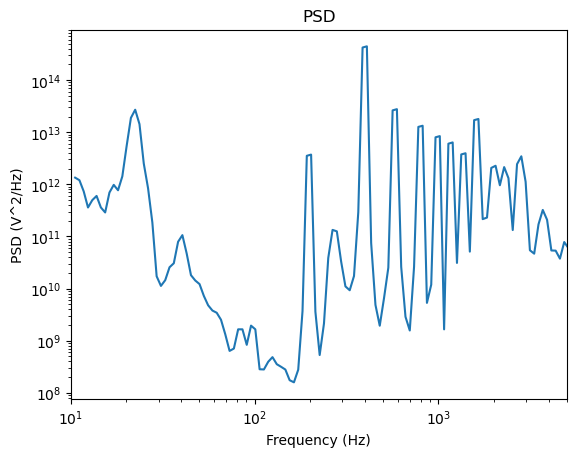

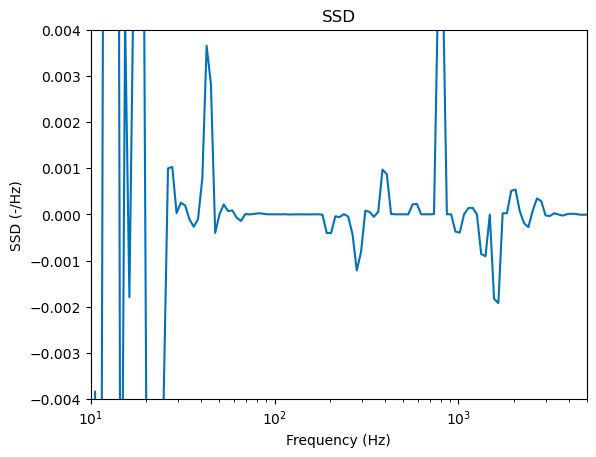

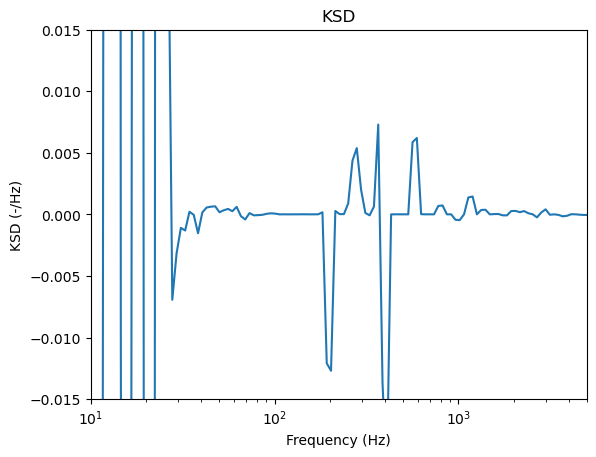

In [39]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np

# Load MAT file
data = scipy.io.loadmat("Audio-1.mat")
GxxW = data['Gx3']
f = data['F']


plt.figure(3)
plt.loglog(F, Gxx3, linewidth=1.5)
plt.title('PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.xlim([10, 5000])

plt.figure(4)
plt.semilogx(F, Sxx3, linewidth=1.5, color=[0, 0.4470, 0.7410])
plt.title('SSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('SSD (-/Hz)')
plt.xlim([10, 5000])
plt.ylim([-.004, .004])

plt.figure(5)
plt.semilogx(F, Kxx3, linewidth=1.5)
plt.title('KSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('KSD (-/Hz)')
plt.xlim([10, 5000])
plt.ylim([-.015, .015])

plt.show()

In [40]:
from scipy.signal import butter, filtfilt
from scipy.signal import hann, welch
import numpy as np

from scipy.io import wavfile

# Read audio file
#filefolder = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_pitch_stability/neumann/0000.wav")

Fs, audio_data = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/trumpet_ramon_reference/neumann/0000.wav")

# Use the audio_data as your x3 or whichever variable you want to replace
x3 = audio_data.astype(float)


M, F, Gx4, Sx4, Kx4 = loychikSD_NP(x3, Fs, Fbe)

# Power Spectral Density
Gxx4 = np.gradient(Gx4, F)

# Skewness Spectral Density
Sxx4 = np.gradient(Sx4, F)

# Kurtosis Spectral Density
Kxx4 = np.gradient(Kx4, F)

# Fourth Central Moment Spectral Density
# M4xx = np.gradient(Kx * Gx ** 2, F)

# Clear variables
# del x, x2, x3

# Save variables
scipy.io.savemat("Audio-1.mat", {"M": M, "F": F, "Gx4": Gx4, "Sx4": Sx4, "Kx4": Kx4})

print("MAT file saved. Mission accomplished.")




/var/folders/g8/ryts82jd3c33vl83y_np4dzm0000gn/T/ipykernel_1986/3301658376.py:10: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs, audio_data = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/trumpet_ramon_reference/neumann/0000.wav")


1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
MAT file saved. Mission accomplished.


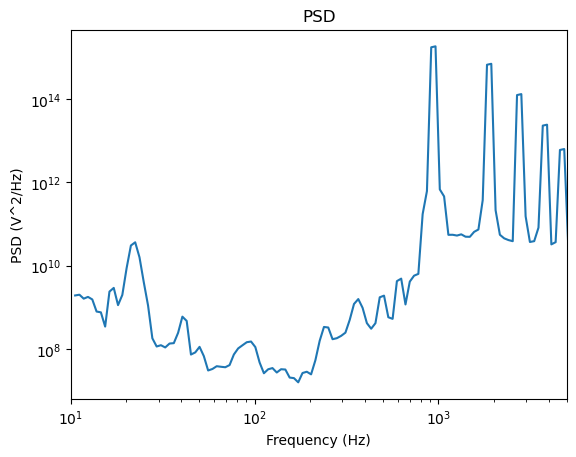

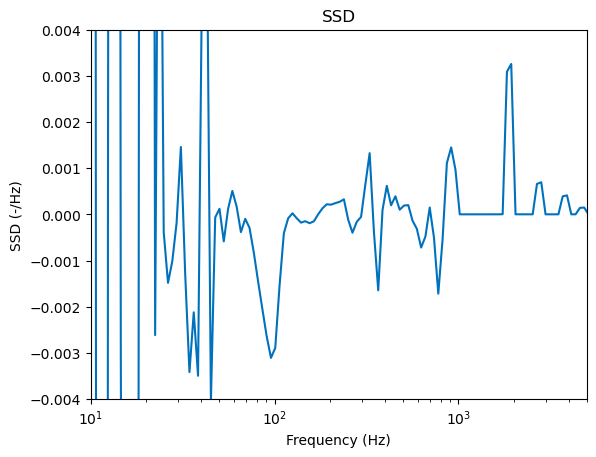

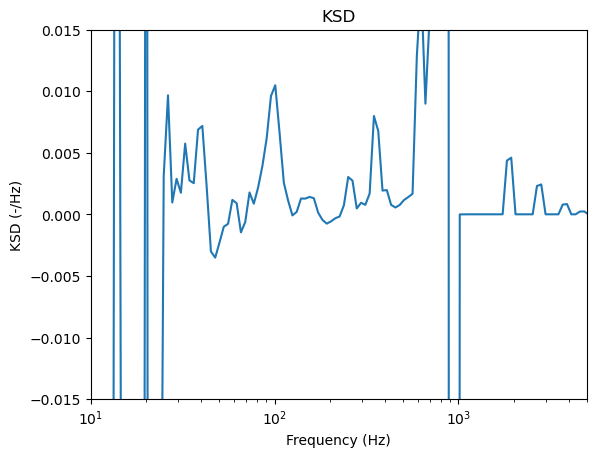

In [41]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np

# Load MAT file
data = scipy.io.loadmat("Audio-1.mat")
GxxW = data['Gx4']
f = data['F']


plt.figure(3)
plt.loglog(F, Gxx4, linewidth=1.5)
plt.title('PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.xlim([10, 5000])

plt.figure(4)
plt.semilogx(F, Sxx4, linewidth=1.5, color=[0, 0.4470, 0.7410])
plt.title('SSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('SSD (-/Hz)')
plt.xlim([10, 5000])
plt.ylim([-.004, .004])

plt.figure(5)
plt.semilogx(F, Kxx4, linewidth=1.5)
plt.title('KSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('KSD (-/Hz)')
plt.xlim([10, 5000])
plt.ylim([-.015, .015])

plt.show()

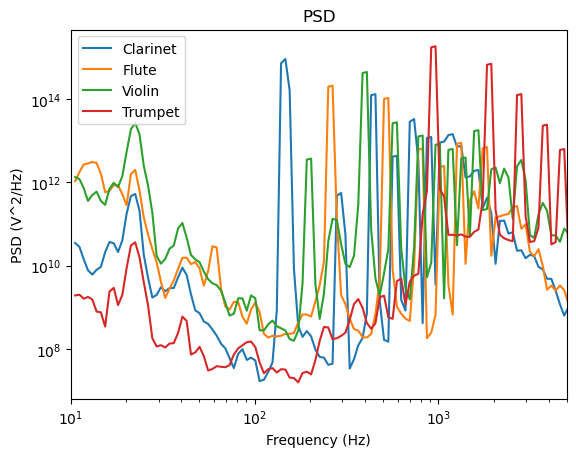

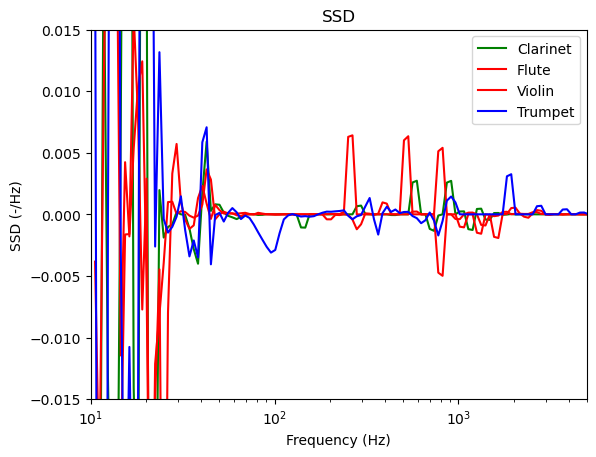

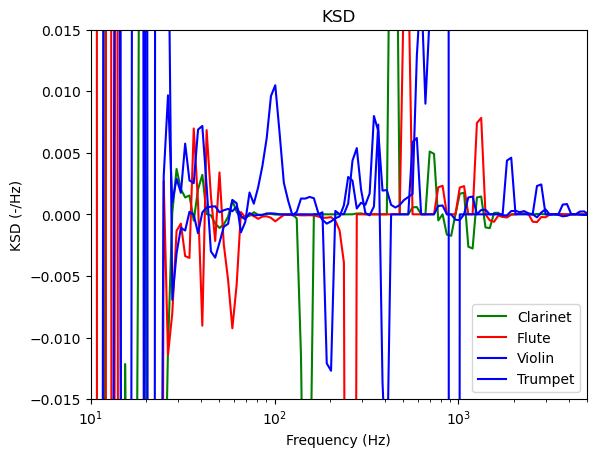

In [47]:
plt.figure(3)
plt.loglog(F, Gxx1, linewidth=1.5)
plt.loglog(F, Gxx2, linewidth=1.5)
plt.loglog(F, Gxx3, linewidth=1.5)
plt.loglog(F, Gxx4, linewidth=1.5)
plt.title('PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.xlim([10, 5000])
plt.legend(labels=["Clarinet", "Flute","Violin","Trumpet"])

plt.figure(4)
plt.semilogx(F, Sxx1, linewidth=1.5,color='green',label="Clarinet")
plt.semilogx(F, Sxx2, linewidth=1.5,color='red',label="Flute")
plt.semilogx(F, Sxx3, linewidth=1.5,color='red',label="violin")
plt.semilogx(F, Sxx4, linewidth=1.5,color='blue',label="Trumpet")

plt.title('SSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('SSD (-/Hz)')
plt.xlim([10, 5000])
plt.ylim([-.015, .015])
plt.legend(labels=["Clarinet", "Flute","Violin","Trumpet"])

plt.show()
plt.figure(5)
plt.semilogx(F, Kxx1, linewidth=1.5,color='green',label="Clarinet")
plt.semilogx(F, Kxx2, linewidth=1.5,color='red',label="Flute")
plt.semilogx(F, Kxx3, linewidth=1.5,color='blue',label="Violin")
plt.semilogx(F, Kxx4, linewidth=1.5,color='blue',label="Trumpet")

plt.title('KSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('KSD (-/Hz)')
plt.xlim([10, 5000])
plt.ylim([-.015, .015])
plt.legend(labels=["Clarinet", "Flute","Violin","Trumpet"])

plt.show()